In [1]:
#Load in the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
rs = np.random.RandomState(42)
import warnings
warnings.filterwarnings('ignore')


In [2]:
#load in the data and view the head
df = pd.read_csv('data.csv')
df.head()

,Date,Values
0,01-03-2014,45.868
1,02-03-2014,47.606
2,03-03-2014,42.580
3,04-03-2014,46.030
4,05-03-2014,44.992


In [3]:
#Explore the data types
df.dtypes

Date       object
Values    float64
dtype: object

In [4]:
#Changing the data types
df['Date'] =pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Values           float64
dtype: object

In [5]:
df

,Date,Values
0,2014-01-03,45.868
1,2014-02-03,47.606
2,2014-03-03,42.580
3,2014-04-03,46.030
4,2014-05-03,44.992
...,...,...
1763,2018-12-28,44.178
1764,2018-12-29,43.526
1765,2018-12-30,43.944
1766,2018-12-31,47.344


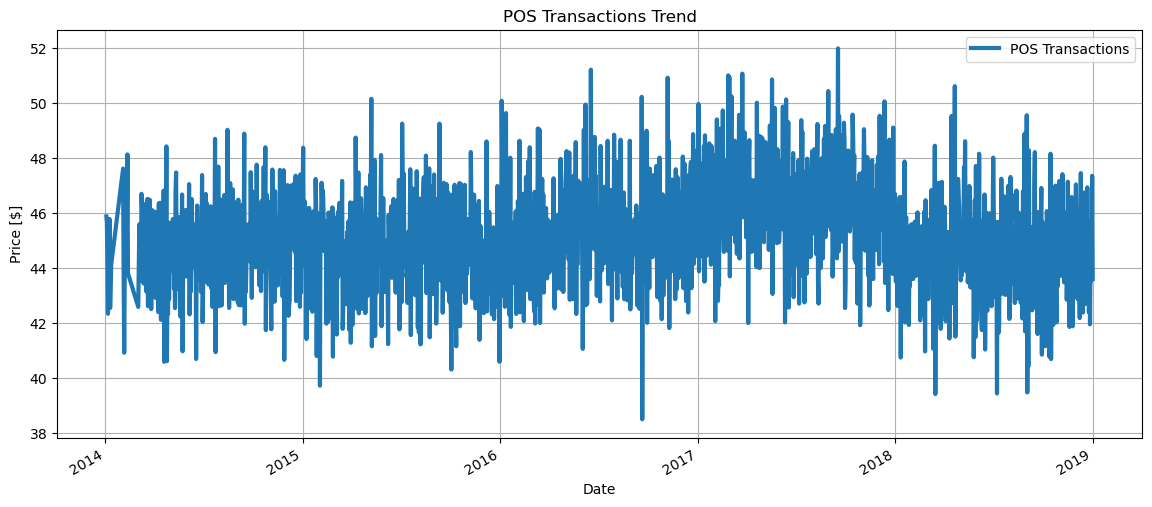

In [6]:
df.plot(x = 'Date', y = 'Values', label = 'POS Transactions', linewidth = 3, figsize = (14, 6));
plt.ylabel('Price [$]')
plt.title('POS Transactions Trend')
plt.legend(loc = "upper right")
plt.grid()

In [7]:
#set the index to the date
df = df.set_index('Date')

In [8]:
df

,Values
Date,
2014-01-03,45.868
2014-02-03,47.606
2014-03-03,42.580
2014-04-03,46.030
2014-05-03,44.992
...,...
2018-12-28,44.178
2018-12-29,43.526
2018-12-30,43.944


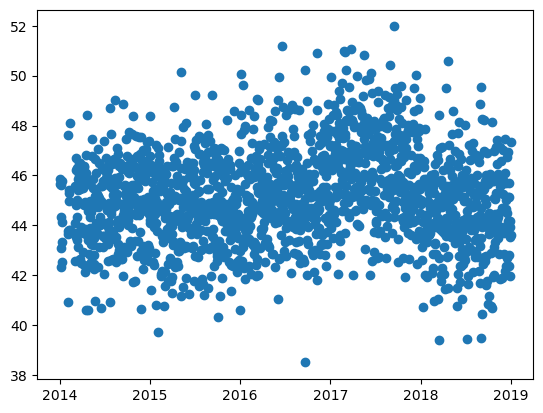

In [9]:
#visualize the data
plt.scatter(x=df.index,y=df['Values'])


In [10]:
#summary statistics
df.describe()

,Values
count,1768.000000
mean,45.123334
std,1.879119
min,38.498000
25%,43.882500
50%,45.000000
75%,46.341500
max,51.972000


In [18]:
clf = IsolationForest(contamination = 0.05)
clf.fit(df)
predictions = clf.predict(df)

In [19]:
import numpy as np
anom_index = np.where(predictions < 0)
anom_index

(array([  50,   55,   62,   84,  109,  145,  167,  272,  332,  338,  362,
         374,  395,  402,  440,  494,  506,  518,  522,  523,  541,  553,
         618,  633,  649,  670,  707,  744,  762,  767,  833,  839,  858,
         933,  934,  942,  978, 1006, 1028, 1068, 1083, 1093, 1095, 1107,
        1113, 1119, 1123, 1129, 1137, 1146, 1158, 1170, 1174, 1179, 1200,
        1204, 1223, 1230, 1272, 1278, 1292, 1296, 1298, 1307, 1311, 1317,
        1323, 1347, 1382, 1398, 1410, 1441, 1457, 1476, 1500, 1506, 1512,
        1513, 1531, 1547, 1550, 1568, 1620, 1673, 1687, 1690, 1706, 1709,
        1738], dtype=int64),)

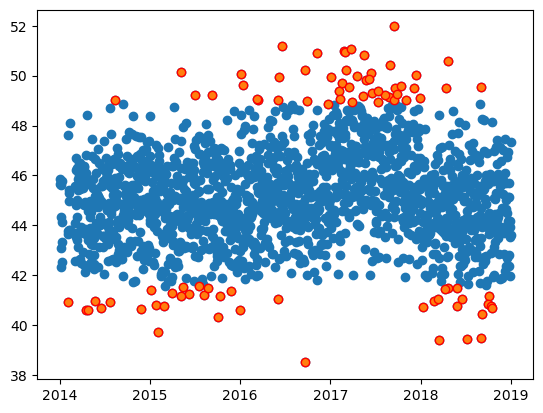

In [20]:
plt.scatter(x=df.index,y=df['Values'])
plt.scatter(df.index[anom_index],df.values[anom_index,0] , edgecolors = "r")